In [1]:
import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat
import arviz as az

def preprocess(file_name):
    t, V = dl.deerload(file_name)
    V = dl.correctphase(V)
    t = dl.correctzerotime(V, t)
    
    return V, t


## Lab B Sample 2 - YopO V599R1-N624R1

In [2]:
[V2_, t2_] = preprocess('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_original_timetraces/2_YopO_V599R1_N624R1/sample2_labB.DSC')

# Cut off first point
t2_=t2_[1:]
V2_=V2_[1:]

In [3]:
# Shift zero time
t2_=t2_-0.12

# Find index of max minus 2+1 artifact correction
new_max=np.max(t2_)-1.2
index=np.where(t2_==new_max)
print(index)

(array([578]),)


In [4]:
# Adjust time and signal for 2+1 artifact correction 
t2=t2_[0:578]
V2=V2_[0:578]

# Normalize
V2=V2/np.max(V2)

Text(0, 0.5, 'V (arb. u.)')

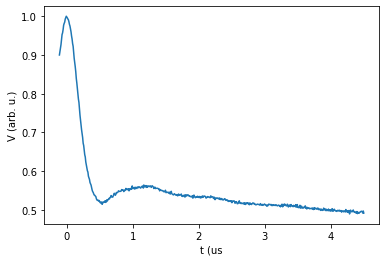

In [5]:
plt.plot(t2,V2)
plt.xlabel('t (us')
plt.ylabel('V (arb. u.)')

## rmax 7, dr=0.03

In [6]:
pars = {"method": 'regularization', "r": np.linspace(1,7,200),"rmax_opt":"user"}

s2_model_rmax7_dr003 = dive.model(t2, V2, pars)

trace1 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_traces/Sample2/s2_4c_50s_5t_rmax7_dr003.trace', model = s2_model_rmax7_dr003['model'])

dive.printsummary(trace1,s2_model_rmax7_dr003)

Time range:          578 points (dt=0.00798616) from -0.112 µs to 4.504 µs
Distance range:      200 points (dr=0.03) from 1 nm to 7 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.030,0.001,0.028,0.032,0.000,0.0,807.0,1723.0,1.01
$λ$,0.434,0.002,0.431,0.438,0.000,0.0,828.0,1822.0,1.01
$V_0$,1.001,0.001,0.999,1.003,0.000,0.0,5056.0,8210.0,1.00
$σ$,0.002,0.000,0.002,0.002,0.000,0.0,150441.0,189910.0,1.00
$\mathrm{lg}(α)$,-0.842,0.068,-0.973,-0.716,0.001,0.0,14111.0,29237.0,1.00


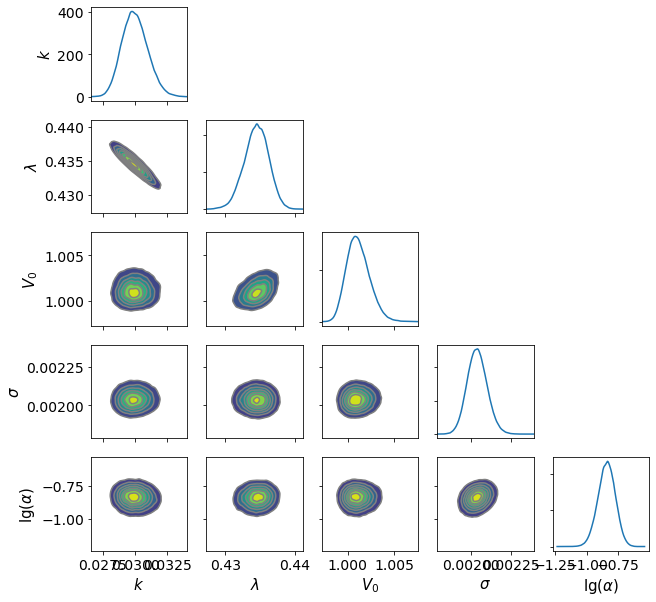

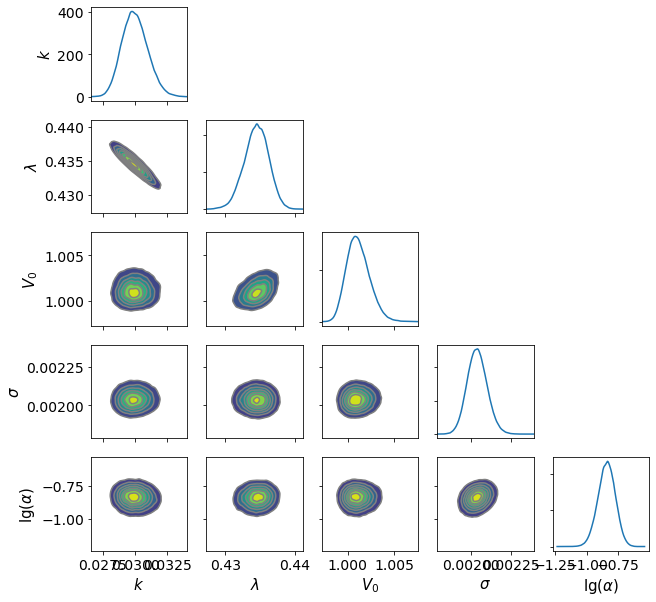

In [7]:
dive.plotcorrelations(trace1,s2_model_rmax7_dr003)

[]

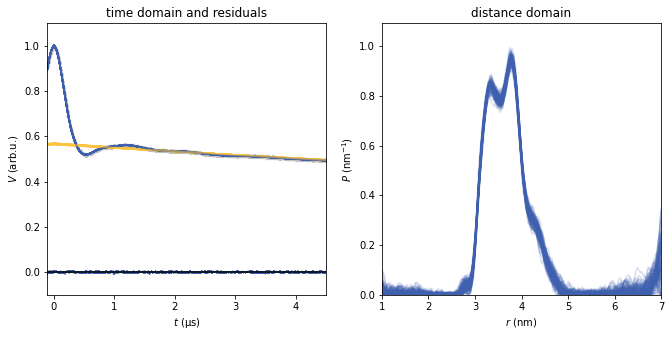

In [8]:
dive.plotresult(trace1,s2_model_rmax7_dr003)

## rmax=7, dr = 0.046

Time range:          578 points (dt=0.00798616) from -0.112 µs to 4.504 µs
Distance range:      130 points (dr=0.0461538) from 1 nm to 7 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.030,0.001,0.028,0.032,0.0,0.0,877.0,2068.0,1.0
$λ$,0.434,0.002,0.431,0.438,0.0,0.0,972.0,2358.0,1.0
$V_0$,1.001,0.001,0.999,1.003,0.0,0.0,4846.0,7816.0,1.0
$σ$,0.002,0.000,0.002,0.002,0.0,0.0,158724.0,187218.0,1.0
$\mathrm{lg}(α)$,-1.143,0.073,-1.281,-1.007,0.0,0.0,22255.0,42221.0,1.0


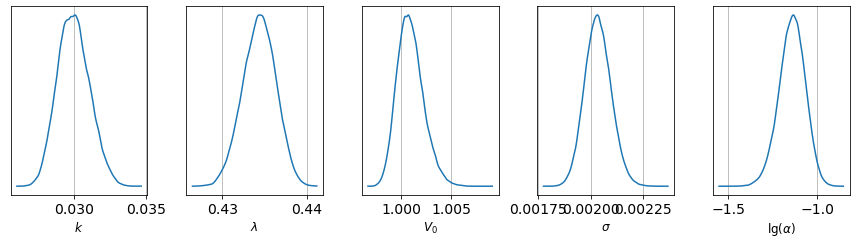

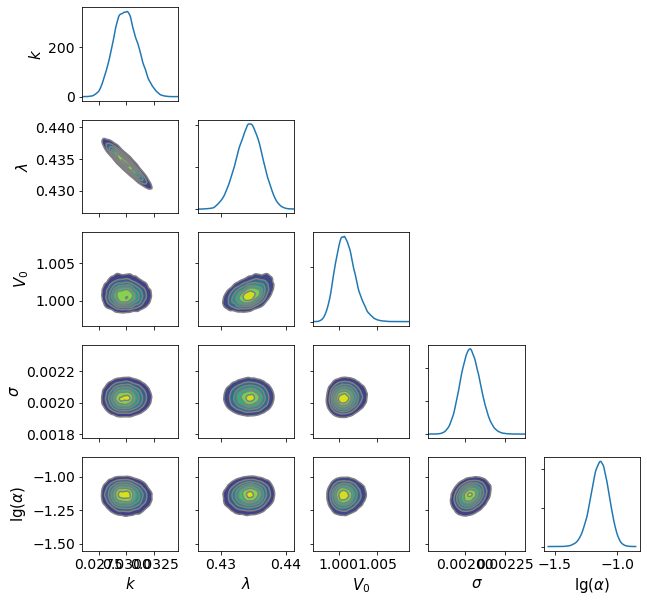

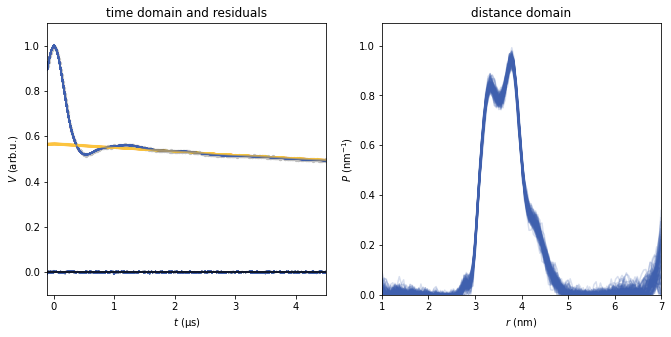

In [9]:
pars = {"method": 'regularization', "r": np.linspace(1,7,130),"rmax_opt":"user"}

s2_model_rmax7_dr0046 = dive.model(t2, V2, pars)

trace2 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_traces/Sample2/s2_4c_50s_5t_rmax7_dr046.trace', model = s2_model_rmax7_dr0046['model'])

dive.summary(trace2,s2_model_rmax7_dr0046)

## rmax=8, dr=0.046

Time range:          578 points (dt=0.00798616) from -0.112 µs to 4.504 µs
Distance range:      150 points (dr=0.0466667) from 1 nm to 8 nm
Model:              regularization


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
$k$,0.019,0.005,0.009,0.027,0.001,0.001,20.0,100.0,1.15
$λ$,0.457,0.009,0.441,0.474,0.002,0.001,20.0,99.0,1.15
$V_0$,1.001,0.001,0.998,1.003,0.000,0.000,3382.0,6257.0,1.00
$σ$,0.002,0.000,0.002,0.002,0.000,0.000,94248.0,117588.0,1.00
$\mathrm{lg}(α)$,-1.090,0.072,-1.227,-0.958,0.001,0.001,4079.0,31596.0,1.00


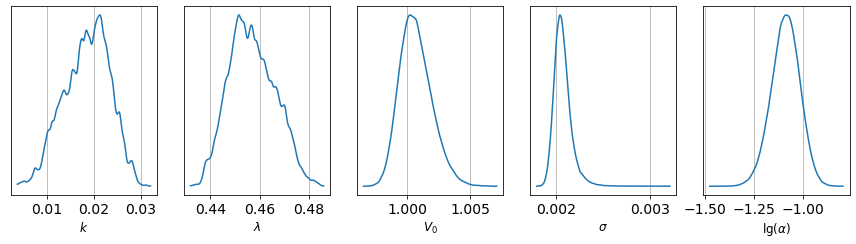

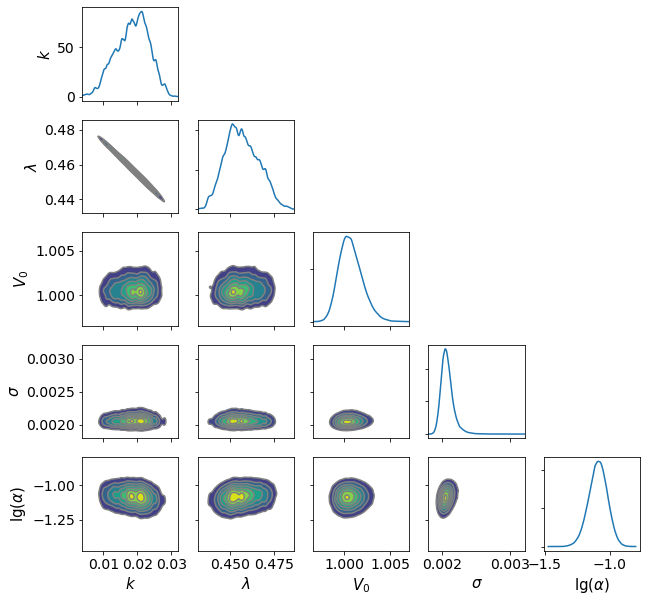

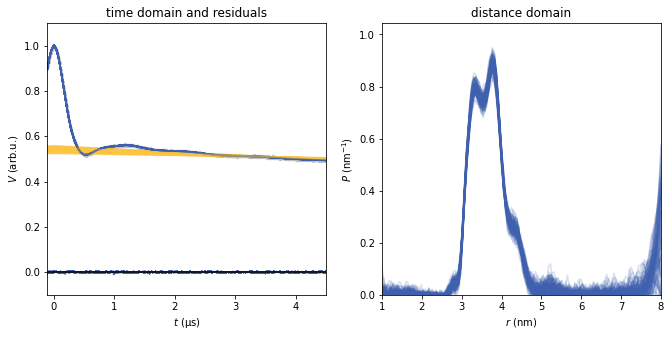

In [10]:
pars = {"method": 'regularization', "r": np.linspace(1,8,150),"rmax_opt":"user"}

s2_model_rmax8_dr0046 = dive.model(t2, V2, pars)

trace3 = pm.load_trace('/Users/sarahsweger/SynologyDrive/SynologyDrive/Bayesian/Nonparametric/Paper/ringtest_traces/Sample2/s2_5c_50s_5t_rmax8_dr0046.trace', model = s2_model_rmax8_dr0046['model'])

dive.summary(trace3,s2_model_rmax8_dr0046)